In [2]:
# Import libraries for data manipulation and analysis
import pandas as pd
import numpy as np

# Import libraries for working with dates and times
import datetime as dt

# Import TensorFlow and Keras libraries for building and training neural networks
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, SimpleRNN, Reshape, Flatten
from keras.models import load_model
from keras.callbacks import ModelCheckpoint
from keras.regularizers import l2

# Import scikit-learn library for various metrics and preprocessing tools
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.preprocessing import MinMaxScaler

# Import matplotlib library for creating plots and charts
import matplotlib.pyplot as plt

# Magic command to display plots inline in the Jupyter Notebook
%matplotlib inline

In [1]:
# Calculate the accuracy of each model
def evaluateModel(test,pred,val,pred_val):
  print('** Testing **')
  test_mae = mean_absolute_error(test, pred)
  print('MAE: ', test_mae)

  test_ape = np.abs((test - pred) / test)
  test_mape = np.mean(test_ape) * 100
  print('MAPE: ', test_mape)

  test_mse = mean_squared_error(test, pred)
  test_rmse = np.sqrt(test_mse)
  print('RMSE: ', test_rmse)

  print('\n** Validate **')
  val_mae = mean_absolute_error(val, pred_val)
  print('MAE: ', val_mae)

  val_ape = np.abs((val - pred_val) / val)
  val_mape = np.mean(val_ape) * 100
  print('MAPE: ', val_mape)

  val_mse = mean_squared_error(val, pred_val)
  val_rmse = np.sqrt(val_mse)
  print('RMSE: ', val_rmse)

In [3]:
# Read in the Gold dataset from a CSV file
df=pd.read_csv("../dataset/cleaned_gc=f.csv")
df=df.set_index(pd.DatetimeIndex(df['Date'].values))


# Preprocessing Data

---

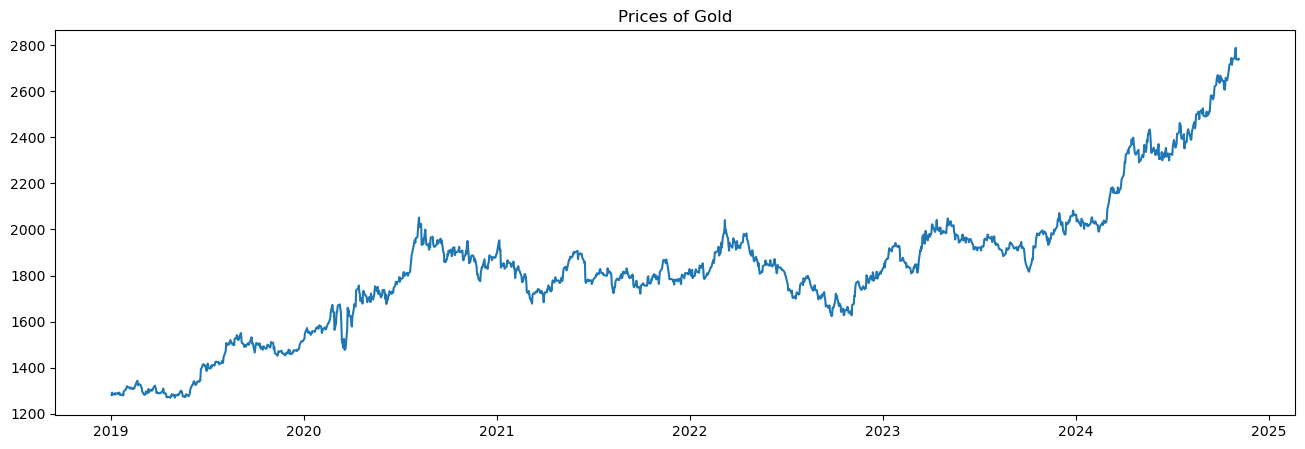

In [4]:
# Format column Date
df.index = pd.to_datetime(df.index,format='%m/%d/%Y')

# Create new Dataframe
df1 = pd.DataFrame(df, columns=['Date', 'Close'])
df1.drop('Date', axis = 1, inplace = True)

# Plot the 'price' column of the 'df' DataFrame
plt.figure(figsize=(16,5))
plt.plot(df1['Close'])
plt.title('Prices of Gold')
plt.show()

# Split dataset (7-2-1)

---



In [5]:
# Create a MinMaxScaler object with a specified range
data = df1.values
sc = MinMaxScaler(feature_range=(0, 1))

# Fit the scaler to the data and transform the data
sc_train = sc.fit_transform(data)

# Split the data
train_size = int(0.7 * len(sc_train))
test_size = int(0.2 * len(sc_train))
val_size = len(sc_train) - train_size - test_size

train_data = sc_train[:train_size]
test_data = sc_train[train_size:train_size+test_size]
val_data = sc_train[train_size+test_size:]
     

In [6]:
# Create training datasets for the model
x_train, y_train = [], []

# Loop through the train data, starting from the 5th value
for i in range(100, len(train_data)):
    # Append the last 100 values to the x_train array
    x_train.append(sc_train[i-100:i, 0])
    # Append the current value to the y_train array
    y_train.append(sc_train[i, 0])

In [8]:
# Convert the x_train and y_train arrays to NumPy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

# Reshape the x_train and y_train arrays to be one-dimensional
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], 1))

In [13]:
# Build the model
model = Sequential()

# Add an LSTM layer with 50 units, input shape of (x_train.shape[1], 1), and return_sequences set to True
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))

# Add an LSTM layer with 50 units
model.add(LSTM(50,return_sequences=True))

# Add an LSTM layer with 50 units
model.add(LSTM(50))

# Add a dense layer with 1 unit
model.add(Dense(1))

# Compile the model with the 'mean_absolute_error' loss function and the 'adam' optimizer
model.compile(loss='mean_absolute_error', optimizer='adam')
# Set the filename to use for saving the model
save_model = 'save_model_7_2_1.keras'

# Create a ModelCheckpoint object to save the model during training
best_model = ModelCheckpoint(save_model, monitor='loss', verbose=2, save_best_only=True, mode='auto')

# Train the model using the 'fit' method
model.fit(x_train, y_train, epochs=80, batch_size=50, verbose=2, callbacks=[best_model])

Epoch 1/80

Epoch 1: loss improved from inf to 0.09131, saving model to save_model_7_2_1.keras
19/19 - 4s - 223ms/step - loss: 0.0913
Epoch 2/80

Epoch 2: loss improved from 0.09131 to 0.03313, saving model to save_model_7_2_1.keras
19/19 - 1s - 54ms/step - loss: 0.0331
Epoch 3/80

Epoch 3: loss improved from 0.03313 to 0.02591, saving model to save_model_7_2_1.keras
19/19 - 1s - 56ms/step - loss: 0.0259
Epoch 4/80

Epoch 4: loss improved from 0.02591 to 0.02382, saving model to save_model_7_2_1.keras
19/19 - 1s - 55ms/step - loss: 0.0238
Epoch 5/80

Epoch 5: loss improved from 0.02382 to 0.02316, saving model to save_model_7_2_1.keras
19/19 - 1s - 53ms/step - loss: 0.0232
Epoch 6/80

Epoch 6: loss improved from 0.02316 to 0.02314, saving model to save_model_7_2_1.keras
19/19 - 1s - 53ms/step - loss: 0.0231
Epoch 7/80

Epoch 7: loss improved from 0.02314 to 0.02216, saving model to save_model_7_2_1.keras
19/19 - 1s - 52ms/step - loss: 0.0222
Epoch 8/80

Epoch 8: loss improved from 0.02

In [15]:
# Transform the y_train array back to the original scale
y_train = sc.inverse_transform(y_train)

# Load the best model from the save_model.keras file
final_model = load_model('save_model_7_2_1.keras')

# Use the model to make predictions on the x_train data
y_train_predict = final_model.predict(x_train)

# Transform the y_train_predict array back to the original scale
y_train_predict = sc.inverse_transform(y_train_predict)

30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step


In [16]:
# Preprocess the test data
test = df1[len(train_data)-100:train_size+test_size].values
test = test.reshape(-1, 1)
sc_test = sc.transform(test)

# Create the x_test array for the test data
x_test = []
for i in range(100, test.shape[0]):
    x_test.append(sc_test[i-100:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the true values for the test data
y_test = data[train_size:train_size+test_size]  # True values

# Use the model to make predictions on the x_test data
y_test_predict = final_model.predict(x_test)

# Transform the y_test_predict array back to the original scale
y_test_predict = sc.inverse_transform(y_test_predict)  # Predicted values

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [17]:
# Preprocess the validate data
val = df1[train_size+test_size-100:].values
val = val.reshape(-1, 1)
sc_val = sc.transform(val)

# Create the x_val array for the validate data
x_val = []
for i in range(100, val.shape[0]):
    x_val.append(sc_val[i-100:i, 0])
x_val = np.array(x_val)
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))

# Get the true values for the validate data
y_val = data[train_size+test_size:]  # True values

# Use the model to make predictions on the x_val data
y_val_predict = final_model.predict(x_val)

# Transform the y_val_predict array back to the original scale
y_val_predict = sc.inverse_transform(y_val_predict)  # Predicted values

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [18]:
# Create an input array using the last 10 days of the scaled test data
x_input = sc_train[len(sc_train) - 100:].reshape(1, -1)

# Print the shape of the input array
print(x_input.shape)

# Convert x_input to a list and extract the first element
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

# Print the temp_input variable
print(temp_input)

(1, 100)
[0.6991178826071462, 0.6866112997919653, 0.6984596414063471, 0.7138625822664999, 0.6892442645951613, 0.6981964094336652, 0.6893760418505963, 0.6779225481952376, 0.6945760828292709, 0.6966824224180088, 0.6966166950593853, 0.6935887210280722, 0.7178120294712937, 0.7367035196804059, 0.7147840554399809, 0.7180095340853523, 0.7259741558535635, 0.7541469115015789, 0.7534886703007799, 0.7593469524802534, 0.7853474799118132, 0.7803449435471974, 0.7783702199448004, 0.7413112080859987, 0.7390073638832022, 0.7473012675209072, 0.7530279337140395, 0.7126118272235253, 0.7311084694736145, 0.729331250485276, 0.747564499493589, 0.7617166853107673, 0.7673117355175587, 0.7611900600963093, 0.7453922712771337, 0.7370985289085228, 0.7380200020820038, 0.7588862158935128, 0.7654029005428793, 0.7853474799118132, 0.7881779493290677, 0.7702079322934365, 0.7792259657596579, 0.8091759403960117, 0.8112822799847497, 0.81753557139234, 0.8156265751485665, 0.7962084597249965, 0.8156265751485665, 0.821748250569

In [19]:
# Initialize variables
lst_output = []
n_steps = 100
i = 0

# Loop through the next 30 days
while(i < 30):
    # If the length of temp_input is greater than 30, use the first 30 elements to make a prediction
    if(len(temp_input) > 100):
        # Extract the first 3 elements of temp_input and reshape them for input to the model
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape((1, -1))
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list and remove the first element
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1
    # If the length of temp_input is less than 30, use the entire list to make a prediction
    else:
        # Reshape temp_input for input to the model
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list
        temp_input.extend(yhat[0].tolist())

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1

# Print the final list of predictions
print(lst_output)

[[0.9342654943466187], [0.8644760251045227], [0.8081810474395752], [0.7735028266906738], [0.755119800567627], [0.7436027526855469], [0.7318578958511353], [0.7171828150749207], [0.700326144695282], [0.6835424900054932], [0.6688869595527649], [0.657339870929718], [0.6487637758255005], [0.6423327922821045], [0.6370353698730469], [0.6320207715034485], [0.626741349697113], [0.6209365725517273], [0.6145377159118652], [0.6075609922409058], [0.6000320911407471], [0.5919537544250488], [0.5833090543746948], [0.5740828514099121], [0.5642836093902588], [0.5539557933807373], [0.5431804060935974], [0.5320653319358826], [0.5207322835922241], [0.5093042254447937]]


In [20]:
# Convert the 'date' column in the dataframe to a list of strings
datelist_train = df['Date'].astype(str).tolist()

# Parse the date strings using strptime(), using the correct format string
datelist_train = [dt.datetime.strptime(date, '%m/%d/%Y').date() for date in datelist_train]

# Generate a list of future dates, starting from the last date in the training data and going for 15 days
datelist_future = pd.date_range(datelist_train[-1], periods=30, freq='1d').tolist()

In [21]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Print the inverse transformed list of predictions
print(y_pred_future)

[[2688.63614223]
 [2582.61198398]
 [2497.08865667]
 [2444.40550541]
 [2416.47801302]
 [2398.98131444]
 [2381.13852852]
 [2358.84414652]
 [2333.23549371]
 [2307.73776632]
 [2285.47308518]
 [2267.93074871]
 [2254.90194544]
 [2245.13199556]
 [2237.0841517 ]
 [2229.4659741 ]
 [2221.44547675]
 [2212.62685959]
 [2202.9057169 ]
 [2192.30667864]
 [2180.86877246]
 [2168.59616372]
 [2155.46313582]
 [2141.44668873]
 [2126.55968074]
 [2110.86966316]
 [2094.49969532]
 [2077.61367521]
 [2060.39650872]
 [2043.03500334]]


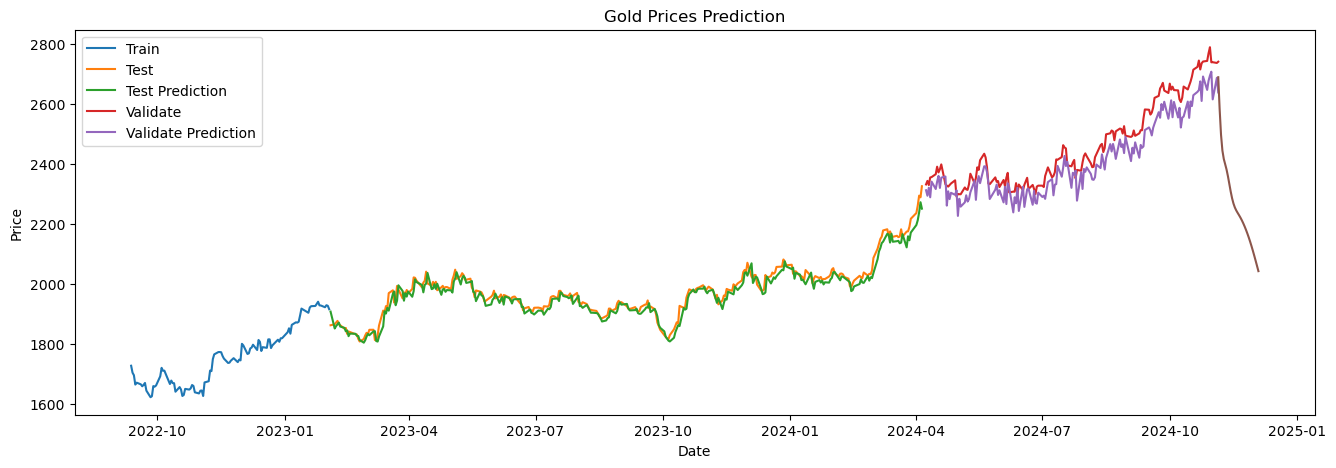

In [23]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Create a dataframe for the future predictions, with the date as the index and the 'price' column
PREDICTIONS_FUTURE = pd.DataFrame(y_pred_future, columns=['Close']).set_index(pd.Series(datelist_future))

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

# Set the figure size and create a subplot
plt.figure(figsize=(16,5))

# Create a plot to compare the predicted and true values for the training and test data
plt.plot(train_data.index[train_size-100:], train_data.Close[train_size-100:])
plt.plot(test_data)

# Plot the actual and predicted prices in the test set, and the predicted future prices
plt.plot(test_data.index, y_test_predict)
plt.plot(val_data)
plt.plot(val_data.index, y_val_predict)

plt.plot(PREDICTIONS_FUTURE)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Gold Prices Prediction')
plt.legend(['Train','Test','Test Prediction','Validate', 'Validate Prediction'])
plt.show()

In [24]:
evaluateModel(test_data.values,y_test_predict,val_data.values,y_val_predict)

** Testing **
MAE:  16.163031121386055
MAPE:  0.8072750030153983
RMSE:  21.053554409185914

** Validate **
MAE:  52.456231194573476
MAPE:  2.1029888766636957
RMSE:  59.761967176350076


# Split dataset (6-3-1)

---



In [25]:
# 4. Split data (6-3-1)
train_size = int(0.6 * len(df1))
test_size = int(0.3 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [26]:
# Create training datasets for the model
x_train, y_train = [], []

# Loop through the train data, starting from the 5th value
for i in range(100, len(train_data)):
    # Append the last 100 values to the x_train array
    x_train.append(sc_train[i-100:i, 0])
    # Append the current value to the y_train array
    y_train.append(sc_train[i, 0])

In [27]:
# Convert the x_train and y_train arrays to NumPy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

# Reshape the x_train and y_train arrays to be one-dimensional
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], 1))

In [29]:
# Build the model
model = Sequential()

# Add an LSTM layer with 50 units, input shape of (x_train.shape[1], 1), and return_sequences set to True
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))

# Add an LSTM layer with 50 units
model.add(LSTM(50,return_sequences=True))

# Add an LSTM layer with 50 units
model.add(LSTM(50))

# Add a dense layer with 1 unit
model.add(Dense(1))

# Compile the model with the 'mean_absolute_error' loss function and the 'adam' optimizer
model.compile(loss='mean_absolute_error', optimizer='adam')
# Set the filename to use for saving the model
save_model = 'save_model_6_3_1.keras'

# Create a ModelCheckpoint object to save the model during training
best_model = ModelCheckpoint(save_model, monitor='loss', verbose=2, save_best_only=True, mode='auto')

# Train the model using the 'fit' method
model.fit(x_train, y_train, epochs=80, batch_size=50, verbose=2, callbacks=[best_model])

Epoch 1/80

Epoch 1: loss improved from inf to 0.10742, saving model to save_model_6_3_1.keras
16/16 - 4s - 269ms/step - loss: 0.1074
Epoch 2/80

Epoch 2: loss improved from 0.10742 to 0.03260, saving model to save_model_6_3_1.keras
16/16 - 1s - 55ms/step - loss: 0.0326
Epoch 3/80

Epoch 3: loss improved from 0.03260 to 0.02502, saving model to save_model_6_3_1.keras
16/16 - 1s - 55ms/step - loss: 0.0250
Epoch 4/80

Epoch 4: loss improved from 0.02502 to 0.02280, saving model to save_model_6_3_1.keras
16/16 - 1s - 53ms/step - loss: 0.0228
Epoch 5/80

Epoch 5: loss did not improve from 0.02280
16/16 - 1s - 54ms/step - loss: 0.0242
Epoch 6/80

Epoch 6: loss did not improve from 0.02280
16/16 - 1s - 59ms/step - loss: 0.0232
Epoch 7/80

Epoch 7: loss did not improve from 0.02280
16/16 - 1s - 69ms/step - loss: 0.0247
Epoch 8/80

Epoch 8: loss improved from 0.02280 to 0.02235, saving model to save_model_6_3_1.keras
16/16 - 1s - 57ms/step - loss: 0.0224
Epoch 9/80

Epoch 9: loss did not impro

In [31]:
# Transform the y_train array back to the original scale
y_train = sc.inverse_transform(y_train)

# Load the best model from the save_model.hdf5 file
final_model = load_model('save_model_6_3_1.keras')

# Use the model to make predictions on the x_train data
y_train_predict = final_model.predict(x_train)

# Transform the y_train_predict array back to the original scale
y_train_predict = sc.inverse_transform(y_train_predict)

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


In [32]:
# Preprocess the test data
test = df1[len(train_data)-100:train_size+test_size].values
test = test.reshape(-1, 1)
sc_test = sc.transform(test)

# Create the x_test array for the test data
x_test = []
for i in range(100, test.shape[0]):
    x_test.append(sc_test[i-100:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the true values for the test data
y_test = data[train_size:train_size+test_size]  # True values

# Use the model to make predictions on the x_test data
y_test_predict = final_model.predict(x_test)

# Transform the y_test_predict array back to the original scale
y_test_predict = sc.inverse_transform(y_test_predict)  # Predicted values

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [33]:
# Preprocess the validate data
val = df1[train_size+test_size-100:].values
val = val.reshape(-1, 1)
sc_val = sc.transform(val)

# Create the x_val array for the validate data
x_val = []
for i in range(100, val.shape[0]):
    x_val.append(sc_val[i-100:i, 0])
x_val = np.array(x_val)
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))

# Get the true values for the validate data
y_val = data[train_size+test_size:]  # True values

# Use the model to make predictions on the x_val data
y_val_predict = final_model.predict(x_val)

# Transform the y_val_predict array back to the original scale
y_val_predict = sc.inverse_transform(y_val_predict)  # Predicted values

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


In [34]:
# Create an input array using the last 10 days of the scaled test data
x_input = sc_train[len(sc_train) - 100:].reshape(1, -1)

# Print the shape of the input array
print(x_input.shape)

# Convert x_input to a list and extract the first element
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

# Print the temp_input variable
print(temp_input)

(1, 100)
[0.6991178826071462, 0.6866112997919653, 0.6984596414063471, 0.7138625822664999, 0.6892442645951613, 0.6981964094336652, 0.6893760418505963, 0.6779225481952376, 0.6945760828292709, 0.6966824224180088, 0.6966166950593853, 0.6935887210280722, 0.7178120294712937, 0.7367035196804059, 0.7147840554399809, 0.7180095340853523, 0.7259741558535635, 0.7541469115015789, 0.7534886703007799, 0.7593469524802534, 0.7853474799118132, 0.7803449435471974, 0.7783702199448004, 0.7413112080859987, 0.7390073638832022, 0.7473012675209072, 0.7530279337140395, 0.7126118272235253, 0.7311084694736145, 0.729331250485276, 0.747564499493589, 0.7617166853107673, 0.7673117355175587, 0.7611900600963093, 0.7453922712771337, 0.7370985289085228, 0.7380200020820038, 0.7588862158935128, 0.7654029005428793, 0.7853474799118132, 0.7881779493290677, 0.7702079322934365, 0.7792259657596579, 0.8091759403960117, 0.8112822799847497, 0.81753557139234, 0.8156265751485665, 0.7962084597249965, 0.8156265751485665, 0.821748250569

In [35]:
# Initialize variables
lst_output = []
n_steps = 100
i = 0

# Loop through the next 30 days
while(i < 30):
    # If the length of temp_input is greater than 30, use the first 30 elements to make a prediction
    if(len(temp_input) > 100):
        # Extract the first 3 elements of temp_input and reshape them for input to the model
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape((1, -1))
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list and remove the first element
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1
    # If the length of temp_input is less than 30, use the entire list to make a prediction
    else:
        # Reshape temp_input for input to the model
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list
        temp_input.extend(yhat[0].tolist())

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1

# Print the final list of predictions
print(lst_output)

[[0.8489277362823486], [0.67763751745224], [0.528561532497406], [0.43199020624160767], [0.36866894364356995], [0.3207453787326813], [0.28325608372688293], [0.25610724091529846], [0.2383846789598465], [0.22794026136398315], [0.2226315289735794], [0.2209503948688507], [0.22198796272277832], [0.22519756853580475], [0.23019170761108398], [0.23662278056144714], [0.244130939245224], [0.2523345947265625], [0.260843425989151], [0.269282728433609], [0.2773194909095764], [0.2846859097480774], [0.29119348526000977], [0.2967369854450226], [0.3012869954109192], [0.30487409234046936], [0.3075689673423767], [0.3094636797904968], [0.31065699458122253], [0.3112459182739258]]


In [36]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Print the inverse transformed list of predictions
print(y_pred_future)

[[2558.99102436]
 [2298.76693231]
 [2072.29070327]
 [1925.57954915]
 [1829.38189012]
 [1756.57641265]
 [1699.62267752]
 [1658.37815685]
 [1631.45404159]
 [1615.5868829 ]
 [1607.52185691]
 [1604.96787806]
 [1606.54415109]
 [1611.42018408]
 [1619.00727992]
 [1628.77736563]
 [1640.18375994]
 [1652.64675294]
 [1665.57336898]
 [1678.39435684]
 [1690.603806  ]
 [1701.79486914]
 [1711.68117754]
 [1720.10286275]
 [1727.01523767]
 [1732.46475514]
 [1736.55880912]
 [1739.43725617]
 [1741.25013995]
 [1742.14483279]]


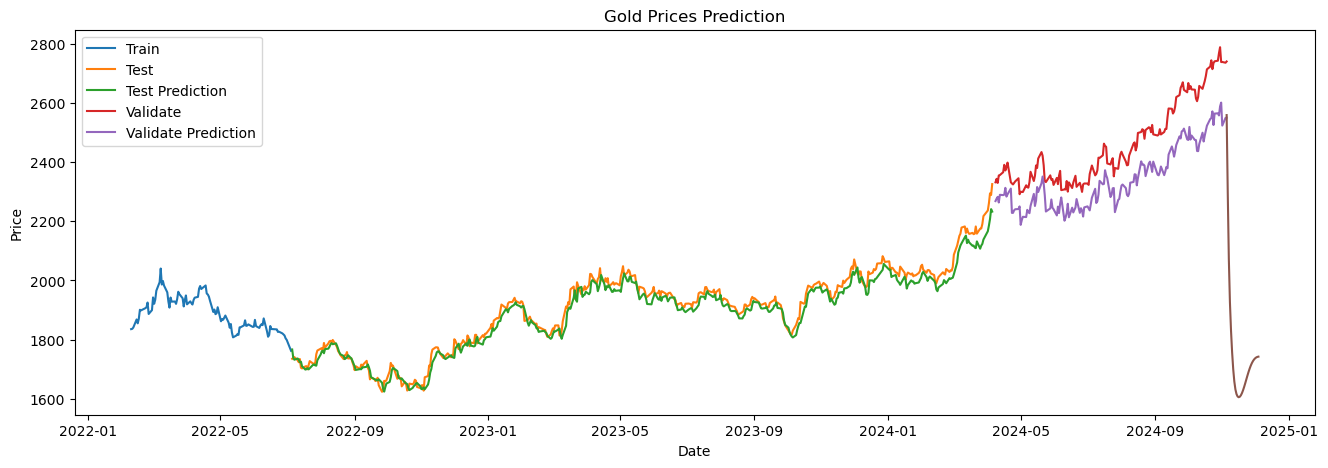

In [40]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Create a dataframe for the future predictions, with the date as the index and the 'price' column
PREDICTIONS_FUTURE = pd.DataFrame(y_pred_future, columns=['Close']).set_index(pd.Series(datelist_future))

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

# Set the figure size and create a subplot
plt.figure(figsize=(16,5))

# Create a plot to compare the predicted and true values for the training and test data
plt.plot(train_data.index[train_size-100:], train_data.Close[train_size-100:])
plt.plot(test_data)

# Plot the actual and predicted prices in the test set, and the predicted future prices
plt.plot(test_data.index, y_test_predict)
plt.plot(val_data)
plt.plot(val_data.index, y_val_predict)

plt.plot(PREDICTIONS_FUTURE)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Gold Prices Prediction')
plt.legend(['Train','Test','Test Prediction','Validate', 'Validate Prediction'])
plt.show()

In [39]:
evaluateModel(test_data.values,y_test_predict,val_data.values,y_val_predict)

** Testing **
MAE:  21.206065492559524
MAPE:  1.0908793498109397
RMSE:  26.785907293417562

** Validate **
MAE:  116.34016375126689
MAPE:  4.662580682745647
RMSE:  123.74653793923054
